In [99]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("jewelry_customers.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Age              505 non-null int64
Income           505 non-null int64
SpendingScore    505 non-null float64
Savings          505 non-null float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [6]:
df.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


In [7]:
df.head(10)

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


In [8]:
df.shape

(505, 4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019599FE69B0>,
      dtype=object)

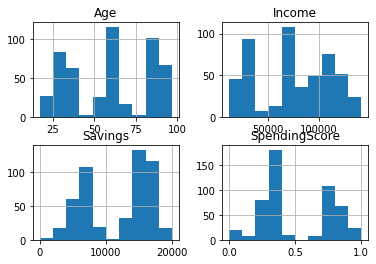

In [10]:
df.hist()

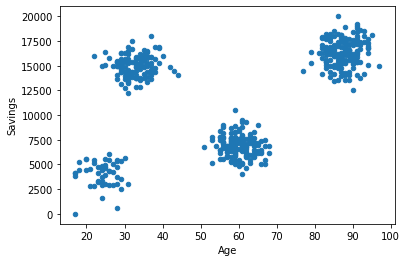

In [12]:
df.plot.scatter(x='Age' , y= 'Savings')

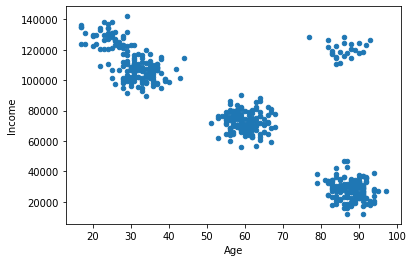

In [13]:
df.plot.scatter(x='Age', y='Income')

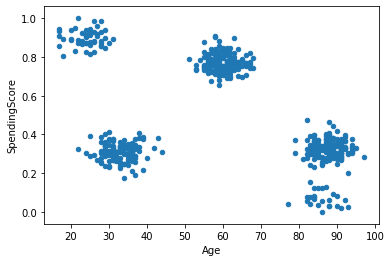

In [14]:
df.plot.scatter(x='Age', y='SpendingScore')

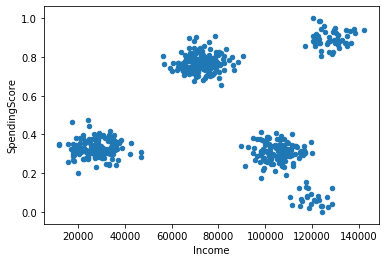

In [16]:
df.plot.scatter(x='Income', y='SpendingScore')

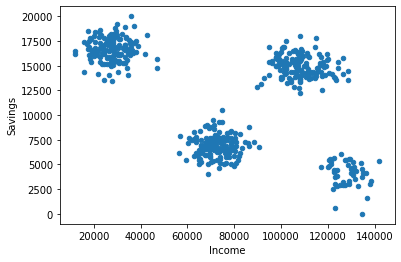

In [17]:
df.plot.scatter(x='Income', y='Savings')

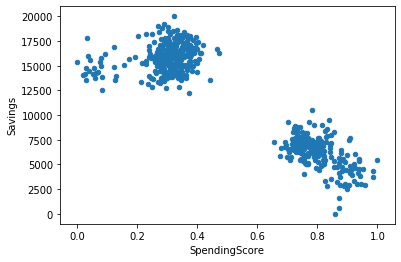

In [18]:
df.plot.scatter(x='SpendingScore', y='Savings')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001959F77DF60>,
      dtype=object)

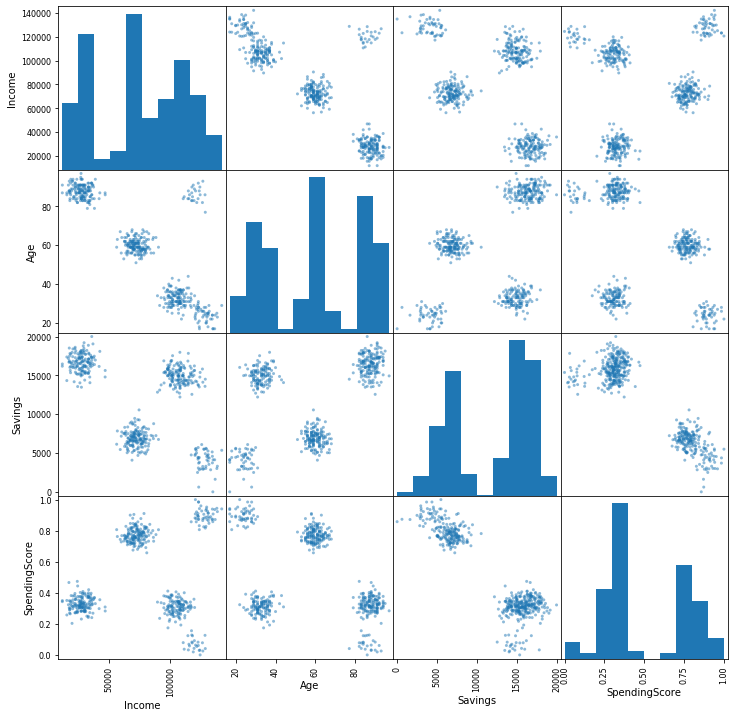

In [47]:
from pandas.plotting import scatter_matrix
attributes=['Income', 'Age', 'Savings', 'SpendingScore']
scatter_matrix(df[attributes], figsize=(12,12))

In [101]:
scaler = StandardScaler()
features = ['Income', 'Savings']
df[features] = scaler.fit_transform(df[features])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000195A1284898>,
      dtype=object)

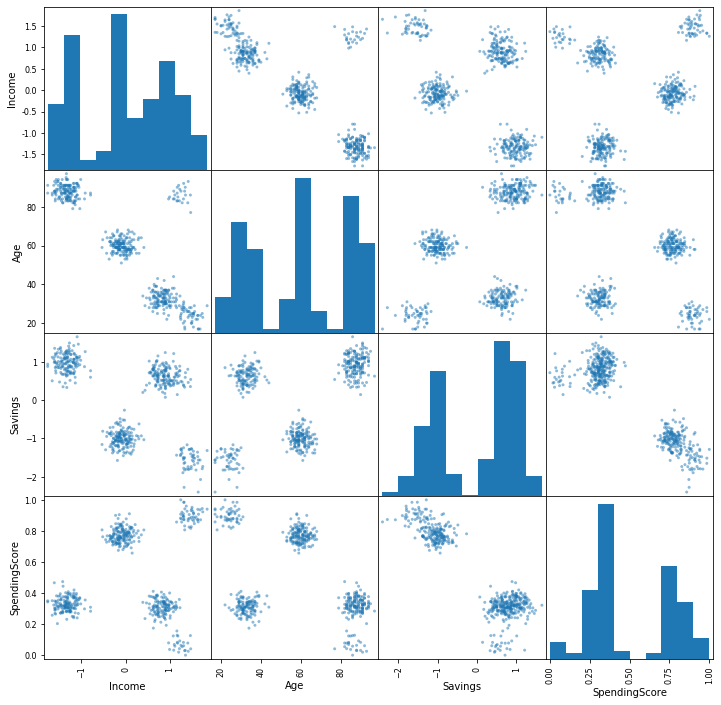

In [102]:
from pandas.plotting import scatter_matrix
attributes=['Income', 'Age', 'Savings', 'SpendingScore']
scatter_matrix(df[attributes], figsize=(12,12))

In [110]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [111]:
y_kmeans = kmeans.predict(df)
centroids = kmeans.cluster_centers_

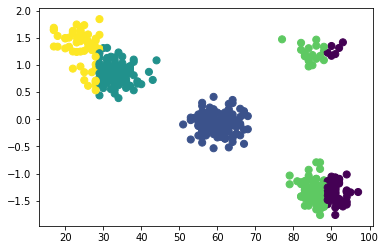

In [112]:
plt.scatter(df.Age, df.Income, c=y_kmeans, s=50, cmap='viridis')

In [107]:
# Try a few different values of K; we'll decide later what's the best.
K = range(1,6)
fits = [KMeans(n_clusters=k, init='k-means++', max_iter=5000, n_init=30, verbose=False, random_state=42).fit(df) for k in K]
centroids = [fit.cluster_centers_ for fit in fits]
inertias = [fit.inertia_ for fit in fits]

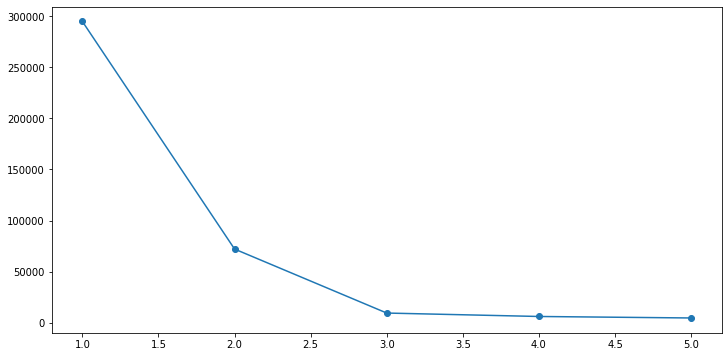

In [108]:
clusters_df = pd.DataFrame( { "num_clusters":K, "cluster_errors": inertias } )
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

In [109]:
k = 4 
km = fits[k]

cluster_terms = []
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(k):
    print("Cluster {:>2} ({:>4} customer):".format(i, len([x for x in km.labels_ if x == i])), end='')
    cterms = []
    cluster_terms.append(' '.join(cterms))
    print("")

Cluster  0 ( 115 customer):
Cluster  1 (  85 customer):
Cluster  2 ( 157 customer):
Cluster  3 (  87 customer):


#DBSCAN

In [171]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=3, min_samples=2).fit(df)

In [172]:
labels = db.labels_
labels

array([ 0,  0,  0,  0,  1,  2,  0,  1,  1,  1,  1,  2,  2,  2,  0,  1,  0,
        1,  1,  1,  2,  1,  0,  1,  1,  2,  2,  0,  1,  0,  0,  0,  1,  0,
        2,  0,  1,  0,  2,  2,  0,  1,  2,  0,  0,  2,  1,  2,  2,  0,  1,
        2,  2,  1,  0,  1,  2,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  2,
        2,  0,  0,  2,  1,  1,  2,  0,  2,  0,  0,  2,  0,  1,  0,  1,  1,
        2,  2,  0,  0,  0,  0,  0,  2,  1,  0,  2,  2,  0,  0,  2,  2,  2,
        2,  2,  2,  1,  1,  2,  2,  0,  1,  2,  0,  2,  2,  2,  0,  2,  2,
        1,  2,  1,  1,  1,  2,  1,  0,  1,  0,  0,  2,  0,  2,  0,  2,  1,
        1,  2,  0,  2,  1,  0,  0,  2,  0,  2,  0,  1,  0,  1,  0,  2,  1,
        0,  1,  1,  2,  0,  1,  0,  2,  1,  0,  2,  1,  2,  1,  0,  2,  0,
        1,  0,  2,  0,  1,  0,  0,  1,  1,  1,  0,  0,  2,  2,  2,  1,  2,
        0,  0,  0,  2,  1,  0,  0,  0,  1,  2,  2,  1,  1,  1,  2,  0,  2,
        0,  2,  0,  1,  2,  0,  1,  1,  1,  1,  0,  1,  2,  2,  2,  1,  0,
        0,  2,  1,  2,  2

TypeError: %d format: a number is required, not numpy.ndarray

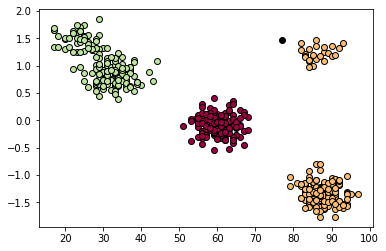

In [173]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = df[class_member_mask & core_samples_mask]
    plt.plot(xy.Age, xy.Income, 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(xy.Age, xy.Income, 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % db.labels_)
plt.show()

In [174]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [175]:
#Gaussian

In [181]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, covariance_type='full').fit(df)

labels = gmm.predict(df)


In [183]:
gmm

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)